<a href="https://colab.research.google.com/github/yana24parashar/Skyhack/blob/main/airlines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

The basic trimming and cleaning of datase values was done on Excel


## CUSTOMERS TABLE

In [ ]:
customers=pd.read_csv('customers.csv')
customers

,customer_id,customer_name,elite_level_code
0,2033123310,Matthew Foster,4.0
1,8186702651,Tammy Walters,NaN
2,2416856629,Jeffery Dixon,NaN
3,1154544516,David Wilkins,2.0
4,5214456437,Elizabeth Daniels,0.0
...,...,...,...
71805,8022667294,Dennis Singleton DDS,NaN
71806,4474867021,Paul Mitchell,1.0
71807,9762042472,Kaylee Lang,NaN
71808,8095620266,Christine Oneal,1.0


In [ ]:
customers.dtypes

,0
customer_id,int64
customer_name,object
elite_level_code,float64


In [ ]:
customers.isna().sum()

,0
customer_id,0
customer_name,0
elite_level_code,25767


In [ ]:
customers['elite_level_code'].mean()

1.3708707078166062

In [ ]:
customers['elite_level_code'] = customers['elite_level_code'].fillna(customers['elite_level_code'].mean())
customers

,customer_id,customer_name,elite_level_code
0,2033123310,Matthew Foster,4.000000
1,8186702651,Tammy Walters,1.370871
2,2416856629,Jeffery Dixon,1.370871
3,1154544516,David Wilkins,2.000000
4,5214456437,Elizabeth Daniels,0.000000
...,...,...,...
71805,8022667294,Dennis Singleton DDS,1.370871
71806,4474867021,Paul Mitchell,1.000000
71807,9762042472,Kaylee Lang,1.370871
71808,8095620266,Christine Oneal,1.000000


In [ ]:
customers=customers.drop(columns=['customer_name'])
customers

,customer_id,elite_level_code
0,2033123310,4.000000
1,8186702651,1.370871
2,2416856629,1.370871
3,1154544516,2.000000
4,5214456437,0.000000
...,...,...
71805,8022667294,1.370871
71806,4474867021,1.000000
71807,9762042472,1.370871
71808,8095620266,1.000000


In [ ]:
from google.colab import files
files.download('customers.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# REASON file
### The basic trimming and cleaning of datase values was done on Excel

In [ ]:
reason=pd.read_csv('reason.csv')
reason

,call_id,primary_call_reason,Unnamed: 2,Unnamed: 3
0,4667960400,Voluntary Cancel,NaN,NaN
1,1122072124,Booking,NaN,NaN
2,6834291559,IRROPS,NaN,NaN
3,2266439882,Upgrade,NaN,NaN
4,1211603231,Seating,NaN,NaN
...,...,...,...,...
66648,7569738090,Mileage Plus,NaN,NaN
66649,1563273072,Post Flight,NaN,NaN
66650,8865997781,Upgrade,NaN,NaN
66651,8019240181,Upgrade,NaN,NaN


In [ ]:
reason.drop(columns=['Unnamed: 2','Unnamed: 3'],inplace=True)
reason

,call_id,primary_call_reason
0,4667960400,Voluntary Cancel
1,1122072124,Booking
2,6834291559,IRROPS
3,2266439882,Upgrade
4,1211603231,Seating
...,...,...
66648,7569738090,Mileage Plus
66649,1563273072,Post Flight
66650,8865997781,Upgrade
66651,8019240181,Upgrade


In [ ]:
reason.isna().sum()

,0
call_id,0
primary_call_reason,0
Unnamed: 2,66653
Unnamed: 3,66630


In [ ]:
reason['primary_call_reason'].unique()

array(['Voluntary Cancel', 'Booking', 'IRROPS', 'Upgrade', 'Seating',
       'Mileage Plus', 'Checkout', 'Voluntary Change', 'Post Flight',
       'Check In', 'OTHERS', 'Communications', 'Schedule Change',
       'Products and Services', 'Digital Support', 'Disability',
       'Unaccompanied Minor', 'Baggage', 'Traveler Updates', 'ETC'],
      dtype=object)

In [ ]:
reason.dtypes

,0
call_id,int64
primary_call_reason,object
Unnamed: 2,float64
Unnamed: 3,object


In [ ]:
reason['primary_call_reason'].value_counts(normalize=True)

,proportion
primary_call_reason,
IRROPS,0.199706
Voluntary Change,0.162753
Seating,0.095495
Mileage Plus,0.087783
Post Flight,0.064963
Communications,0.057612
Products and Services,0.049990
Baggage,0.042489
Upgrade,0.041078


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

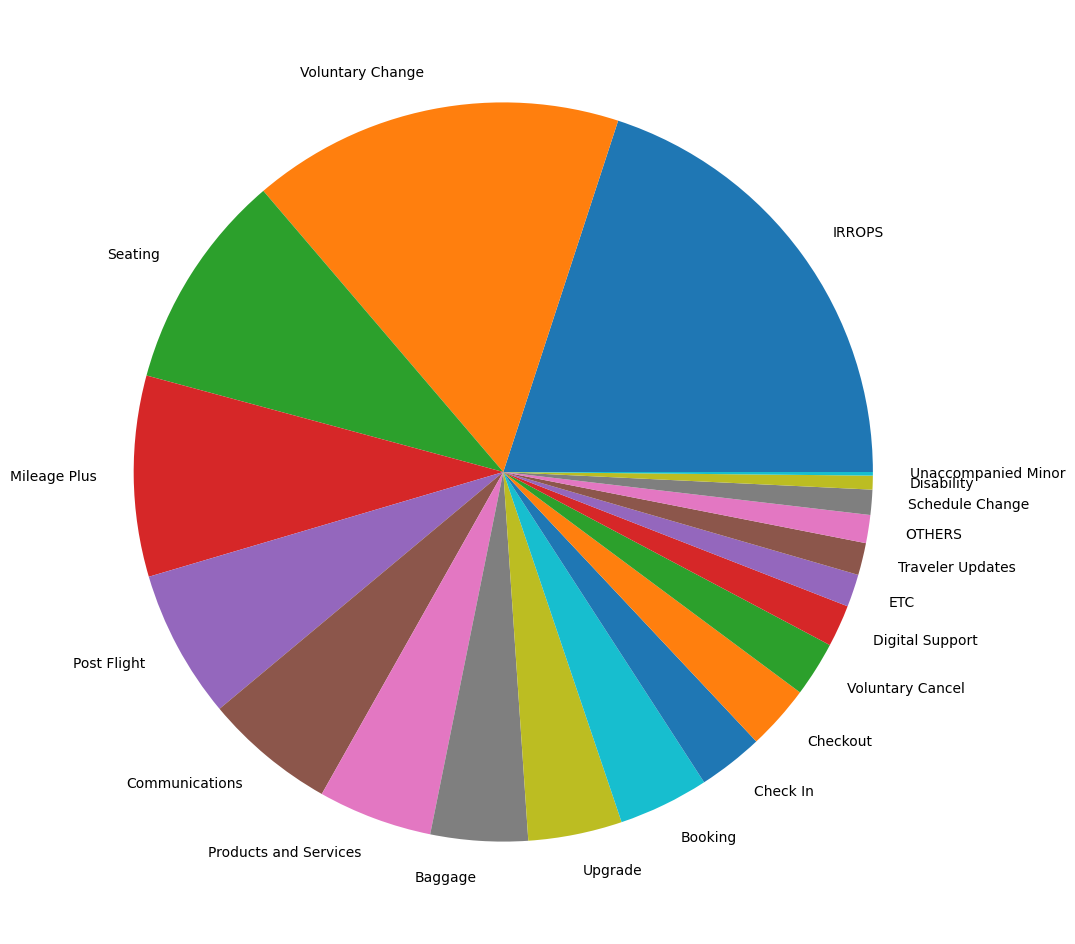

In [ ]:
# Values and their corresponding labels
plt.figure(figsize=(18, 12))
call_reason_counts = reason['primary_call_reason'].value_counts()
call_reason_labels = call_reason_counts.index

# Create the pie chart
plt.pie(call_reason_counts, labels=call_reason_labels)

# Display the chart

plt.show()

## Calls Dataset

In [ ]:
calls=pd.read_csv('modified_calls_dataset.csv')
calls

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_duration,handle_time(delay)
0,4667960400,2033123310,963118,31-07-2024 23:56,01-08-2024 00:03,01-08-2024 00:34,38,7
1,1122072124,8186702651,519057,01-08-2024 00:03,01-08-2024 00:06,01-08-2024 00:18,15,3
2,6834291559,2416856629,158319,31-07-2024 23:59,01-08-2024 00:07,01-08-2024 00:26,27,8
3,2266439882,1154544516,488324,01-08-2024 00:05,01-08-2024 00:10,01-08-2024 00:17,12,5
4,1211603231,5214456437,721730,01-08-2024 00:04,01-08-2024 00:14,01-08-2024 00:23,19,10
...,...,...,...,...,...,...,...,...
71805,1563273072,8022667294,413148,31-08-2024 23:48,31-08-2024 23:57,01-09-2024 00:25,37,9
71806,8865997781,4474867021,980156,31-08-2024 23:55,31-08-2024 23:58,01-09-2024 00:06,11,3
71807,8019240181,9762042472,616988,31-08-2024 23:52,31-08-2024 23:58,01-09-2024 00:04,12,6
71808,8332067080,8095620266,161354,31-08-2024 23:53,31-08-2024 23:59,01-09-2024 00:03,10,6


In [ ]:
calls.dtypes

,0
call_id,int64
customer_id,int64
agent_id,int64
call_start_datetime,object
agent_assigned_datetime,object
call_end_datetime,object
call_duration,int64
handle_time(delay),int64


In [ ]:
calls.isna().sum()

,0
call_id,0
customer_id,0
agent_id,0
call_start_datetime,0
agent_assigned_datetime,0
call_end_datetime,0
call_duration,0
handle_time(delay),0


In [ ]:
calls.shape

(71810, 8)

In [ ]:
calls=calls.dropna()

In [ ]:
calls.shape

(71810, 8)

## Sentiment dataset

In [ ]:
sentiment=pd.read_csv('sentiment.csv')
sentiment

,call_id,agent_id,agent_tone,customer_tone,average_sentiment,silence_percent_average
0,4667960400,963118,neutral,angry,-0.04,0.39
1,1122072124,519057,calm,neutral,0.02,0.35
2,6834291559,158319,neutral,polite,-0.13,0.32
3,2266439882,488324,neutral,frustrated,-0.20,0.20
4,1211603231,721730,neutral,polite,-0.05,0.35
...,...,...,...,...,...,...
71805,1563273072,413148,calm,calm,0.05,0.34
71806,8865997781,980156,calm,frustrated,0.03,0.22
71807,8019240181,616988,calm,polite,0.05,0.42
71808,8332067080,161354,neutral,polite,-0.07,0.13


In [ ]:
sentiment.dtypes

,0
call_id,int64
agent_id,int64
agent_tone,object
customer_tone,object
average_sentiment,float64
silence_percent_average,float64


In [ ]:
sentiment.isna().sum()

,0
call_id,0
agent_id,0
agent_tone,217
customer_tone,0
average_sentiment,109
silence_percent_average,0


Joined table calls and sentiment

In [ ]:
joined=pd.read_csv('Joined.csv')
joined

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_duration,handle_time,call_id.1,agent_id.1,agent_tone,customer_tone,average_sentiment,silence_percent_average
0,4667960400,2033123310,963118,31-07-2024 23:56,01-08-2024 00:03,01-08-2024 00:34,38,7,4667960400,963118,neutral,angry,-0.04,0.39
1,1122072124,8186702651,519057,01-08-2024 00:03,01-08-2024 00:06,01-08-2024 00:18,15,3,1122072124,519057,calm,neutral,0.02,0.35
2,6834291559,2416856629,158319,31-07-2024 23:59,01-08-2024 00:07,01-08-2024 00:26,27,8,6834291559,158319,neutral,polite,-0.13,0.32
3,2266439882,1154544516,488324,01-08-2024 00:05,01-08-2024 00:10,01-08-2024 00:17,12,5,2266439882,488324,neutral,frustrated,-0.20,0.20
4,1211603231,5214456437,721730,01-08-2024 00:04,01-08-2024 00:14,01-08-2024 00:23,19,10,1211603231,721730,neutral,polite,-0.05,0.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2878255662,2721963232,422969,01-08-2024 16:49,01-08-2024 16:53,01-08-2024 16:56,7,4,2878255662,422969,neutral,angry,-0.07,0.24
996,3532357667,3170873328,686999,01-08-2024 16:43,01-08-2024 16:53,01-08-2024 16:57,14,10,3532357667,686999,neutral,calm,-0.19,0.04
997,873151335,8504539471,149315,01-08-2024 16:46,01-08-2024 16:53,01-08-2024 17:03,17,7,873151335,149315,calm,calm,0.10,0.74
998,8503133831,3651723139,251287,01-08-2024 16:45,01-08-2024 16:54,01-08-2024 17:38,53,9,8503133831,251287,neutral,neutral,-0.02,0.29


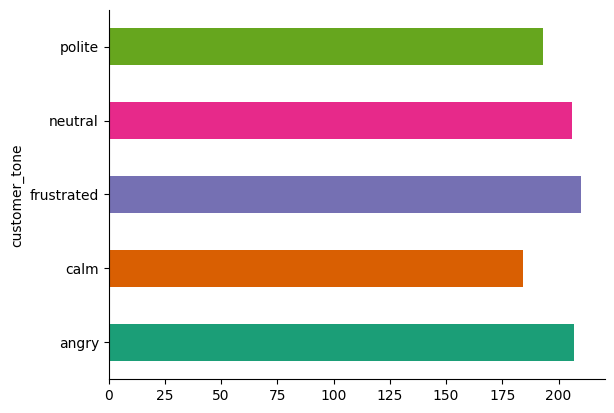

In [ ]:
# @title customer_tone

from matplotlib import pyplot as plt
import seaborn as sns
joined.groupby('customer_tone').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

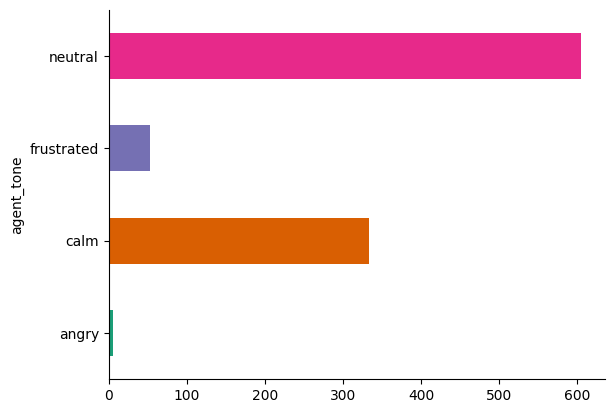

In [ ]:
# @title agent_tone

from matplotlib import pyplot as plt
import seaborn as sns
joined.groupby('agent_tone').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
merged=pd.read_csv('CombinedData.csv')
merged

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_duration,handle_time,customer_id.1,customer_name,elite_level_code,call_id.1,primary_call_reason,call_id.2,agent_id.1,agent_tone,customer_tone,average_sentiment,silence_percent_average
0,4667960400,2033123310,963118,31-07-2024 23:56,01-08-2024 00:03,01-08-2024 00:34,38,7,2033123310,Matthew Foster,4.0,4667960400,Voluntary Cancel,4667960400,963118,neutral,angry,-0.04,0.39
1,2266439882,1154544516,488324,01-08-2024 00:05,01-08-2024 00:10,01-08-2024 00:17,12,5,1154544516,David Wilkins,2.0,2266439882,Upgrade,2266439882,488324,neutral,frustrated,-0.20,0.20
2,4113684017,1528835057,158319,01-08-2024 00:20,01-08-2024 00:28,01-08-2024 00:37,17,8,1528835057,Jonathan Parker,NaN,4113684017,IRROPS,4113684017,158319,neutral,angry,-0.19,0.29
3,7892954313,385356591,519057,01-08-2024 00:27,01-08-2024 00:37,01-08-2024 00:40,13,10,385356591,Travis Collins,0.0,7892954313,Post Flight,7892954313,519057,calm,angry,0.26,0.22
4,9009313118,1937394483,963118,01-08-2024 00:38,01-08-2024 00:47,01-08-2024 01:31,53,9,1937394483,Alicia Humphrey,NaN,9009313118,Post Flight,9009313118,963118,neutral,angry,-0.04,0.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,7814734874,1981667328,470395,03-08-2024 13:37,03-08-2024 13:41,03-08-2024 13:49,12,4,1981667328,Bradley Frost,NaN,7814734874,IRROPS,7814734874,470395,neutral,calm,-0.09,0.27
996,173504995,2055717510,731015,03-08-2024 13:37,03-08-2024 13:41,03-08-2024 13:44,7,4,2055717510,Maria Preston,NaN,173504995,Booking,173504995,731015,neutral,angry,0.00,0.16
997,1828569960,533111197,748700,03-08-2024 13:35,03-08-2024 13:42,03-08-2024 13:53,18,7,533111197,Nicole Beltran,1.0,1828569960,IRROPS,1828569960,748700,neutral,calm,-0.13,0.37
998,6079495017,957541472,591324,03-08-2024 13:36,03-08-2024 13:42,03-08-2024 14:07,31,6,957541472,Tamara Miles,3.0,6079495017,Mileage Plus,6079495017,591324,calm,calm,0.04,0.54


In [ ]:
sentiment=pd.read_csv('sentiment.csv')
sentiment

,call_id,agent_id,agent_tone,customer_tone,average_sentiment,silence_percent_average
0,4667960400,963118,neutral,angry,-0.04,0.39
1,1122072124,519057,calm,neutral,0.02,0.35
2,6834291559,158319,neutral,polite,-0.13,0.32
3,2266439882,488324,neutral,frustrated,-0.20,0.20
4,1211603231,721730,neutral,polite,-0.05,0.35
...,...,...,...,...,...,...
71805,1563273072,413148,calm,calm,0.05,0.34
71806,8865997781,980156,calm,frustrated,0.03,0.22
71807,8019240181,616988,calm,polite,0.05,0.42
71808,8332067080,161354,neutral,polite,-0.07,0.13


# MERGING THE 4 TABLES

In [ ]:
merged.drop(columns=['call_id	customer_id'	,'agent_id'	,'call_start_datetime'	,'agent_assigned_datetime','call_end_datetime',])

In [ ]:
merged_table = calls.merge(customers, on='customer_id')
merged_table = merged_table.merge(sentiment, on='call_id')
merged_table = merged_table.merge(reason, on='call_id')

# Print or use the merged table
print(merged_table)

          call_id  customer_id  agent_id_x call_start_datetime  \
0      4667960400   2033123310      963118    31-07-2024 23:56   
1      1122072124   8186702651      519057    01-08-2024 00:03   
2      6834291559   2416856629      158319    31-07-2024 23:59   
3      2266439882   1154544516      488324    01-08-2024 00:05   
4      1211603231   5214456437      721730    01-08-2024 00:04   
...           ...          ...         ...                 ...   
66648  7569738090   7367304988      783441    31-08-2024 23:51   
66649  1563273072   8022667294      413148    31-08-2024 23:48   
66650  8865997781   4474867021      980156    31-08-2024 23:55   
66651  8019240181   9762042472      616988    31-08-2024 23:52   
66652  8210720833   8014388758      547592    31-08-2024 23:49   

      agent_assigned_datetime call_end_datetime  call_duration  \
0            01-08-2024 00:03  01-08-2024 00:34             38   
1            01-08-2024 00:06  01-08-2024 00:18             15   
2        

In [ ]:
merged_table

,call_id,customer_id,agent_id_x,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_duration,handle_time(delay),elite_level_code,agent_id_y,agent_tone,customer_tone,average_sentiment,silence_percent_average,primary_call_reason
0,4667960400,2033123310,963118,31-07-2024 23:56,01-08-2024 00:03,01-08-2024 00:34,38,7,4.000000,963118,neutral,angry,-0.04,0.39,Voluntary Cancel
1,1122072124,8186702651,519057,01-08-2024 00:03,01-08-2024 00:06,01-08-2024 00:18,15,3,1.370871,519057,calm,neutral,0.02,0.35,Booking
2,6834291559,2416856629,158319,31-07-2024 23:59,01-08-2024 00:07,01-08-2024 00:26,27,8,1.370871,158319,neutral,polite,-0.13,0.32,IRROPS
3,2266439882,1154544516,488324,01-08-2024 00:05,01-08-2024 00:10,01-08-2024 00:17,12,5,2.000000,488324,neutral,frustrated,-0.20,0.20,Upgrade
4,1211603231,5214456437,721730,01-08-2024 00:04,01-08-2024 00:14,01-08-2024 00:23,19,10,0.000000,721730,neutral,polite,-0.05,0.35,Seating
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66648,7569738090,7367304988,783441,31-08-2024 23:51,31-08-2024 23:57,01-09-2024 00:07,16,6,2.000000,783441,neutral,frustrated,-0.19,0.51,Mileage Plus
66649,1563273072,8022667294,413148,31-08-2024 23:48,31-08-2024 23:57,01-09-2024 00:25,37,9,1.370871,413148,calm,calm,0.05,0.34,Post Flight
66650,8865997781,4474867021,980156,31-08-2024 23:55,31-08-2024 23:58,01-09-2024 00:06,11,3,1.000000,980156,calm,frustrated,0.03,0.22,Upgrade
66651,8019240181,9762042472,616988,31-08-2024 23:52,31-08-2024 23:58,01-09-2024 00:04,12,6,1.370871,616988,calm,polite,0.05,0.42,Upgrade


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
le = LabelEncoder()

# Fit the LabelEncoder on the entire column
le.fit(merged_table['primary_call_reason'])

# Print the encoder's classes_ attribute
print(le.classes_)

# Create a mapping dictionary
mapping = dict(zip(le.classes_, range(len(le.classes_))))
print(mapping)

merged_table['primary_call_reason_encoded'] = le.transform(merged_table['primary_call_reason'])
print(merged_table)

['Baggage' 'Booking' 'Check In' 'Checkout' 'Communications'
 'Digital Support' 'Disability' 'ETC' 'IRROPS' 'Mileage Plus' 'OTHERS'
 'Post Flight' 'Products and Services' 'Schedule Change' 'Seating'
 'Traveler Updates' 'Unaccompanied Minor' 'Upgrade' 'Voluntary Cancel'
 'Voluntary Change']
{'Baggage': 0, 'Booking': 1, 'Check In': 2, 'Checkout': 3, 'Communications': 4, 'Digital Support': 5, 'Disability': 6, 'ETC': 7, 'IRROPS': 8, 'Mileage Plus': 9, 'OTHERS': 10, 'Post Flight': 11, 'Products and Services': 12, 'Schedule Change': 13, 'Seating': 14, 'Traveler Updates': 15, 'Unaccompanied Minor': 16, 'Upgrade': 17, 'Voluntary Cancel': 18, 'Voluntary Change': 19}
          call_id  customer_id  agent_id_x call_start_datetime  \
0      4667960400   2033123310      963118    31-07-2024 23:56   
1      1122072124   8186702651      519057    01-08-2024 00:03   
2      6834291559   2416856629      158319    31-07-2024 23:59   
3      2266439882   1154544516      488324    01-08-2024 00:05   
4    

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
le = LabelEncoder()

# Fit the LabelEncoder on the entire column
le.fit(merged_table['agent_tone'])

# Print the encoder's classes_ attribute
print(le.classes_)

# Create a mapping dictionary
mapping = dict(zip(le.classes_, range(len(le.classes_))))
print(mapping)

# Transform the 'agent_tone' column instead of 'agent_tone_encoded'
merged_table['agent_tone'] = le.transform(merged_table['agent_tone'])  # Changed to 'agent_tone'
print(merged_table)

[0 1 2 3 4 5]
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5}
          call_id  customer_id  agent_id_x call_start_datetime  \
0      4667960400   2033123310      963118    31-07-2024 23:56   
1      1122072124   8186702651      519057    01-08-2024 00:03   
2      6834291559   2416856629      158319    31-07-2024 23:59   
3      2266439882   1154544516      488324    01-08-2024 00:05   
4      1211603231   5214456437      721730    01-08-2024 00:04   
...           ...          ...         ...                 ...   
66648  7569738090   7367304988      783441    31-08-2024 23:51   
66649  1563273072   8022667294      413148    31-08-2024 23:48   
66650  8865997781   4474867021      980156    31-08-2024 23:55   
66651  8019240181   9762042472      616988    31-08-2024 23:52   
66652  8210720833   8014388758      547592    31-08-2024 23:49   

      agent_assigned_datetime call_end_datetime  call_duration  \
0            01-08-2024 00:03  01-08-2024 00:34             38   
1            01-08-2024 

In [ ]:
merged_table

,call_id,customer_id,agent_id_x,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_duration,handle_time(delay),elite_level_code,agent_id_y,agent_tone,customer_tone,average_sentiment,silence_percent_average,primary_call_reason,primary_call_reason_encoded
0,4667960400,2033123310,963118,31-07-2024 23:56,01-08-2024 00:03,01-08-2024 00:34,38,7,4.000000,963118,3,0,-0.04,0.39,Voluntary Cancel,18
1,1122072124,8186702651,519057,01-08-2024 00:03,01-08-2024 00:06,01-08-2024 00:18,15,3,1.370871,519057,1,3,0.02,0.35,Booking,1
2,6834291559,2416856629,158319,31-07-2024 23:59,01-08-2024 00:07,01-08-2024 00:26,27,8,1.370871,158319,3,4,-0.13,0.32,IRROPS,8
3,2266439882,1154544516,488324,01-08-2024 00:05,01-08-2024 00:10,01-08-2024 00:17,12,5,2.000000,488324,3,2,-0.20,0.20,Upgrade,17
4,1211603231,5214456437,721730,01-08-2024 00:04,01-08-2024 00:14,01-08-2024 00:23,19,10,0.000000,721730,3,4,-0.05,0.35,Seating,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66648,7569738090,7367304988,783441,31-08-2024 23:51,31-08-2024 23:57,01-09-2024 00:07,16,6,2.000000,783441,3,2,-0.19,0.51,Mileage Plus,9
66649,1563273072,8022667294,413148,31-08-2024 23:48,31-08-2024 23:57,01-09-2024 00:25,37,9,1.370871,413148,1,1,0.05,0.34,Post Flight,11
66650,8865997781,4474867021,980156,31-08-2024 23:55,31-08-2024 23:58,01-09-2024 00:06,11,3,1.000000,980156,1,2,0.03,0.22,Upgrade,17
66651,8019240181,9762042472,616988,31-08-2024 23:52,31-08-2024 23:58,01-09-2024 00:04,12,6,1.370871,616988,1,4,0.05,0.42,Upgrade,17


In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=merged_table)

https://docs.google.com/spreadsheets/d/1xcN8R5czrOqDaBNndzgBdYkOjGpXA62sfMANnhqYqAQ#gid=0


/usr/local/lib/python3.10/dist-packages/google/colab/sheets.py:31: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return frame.applymap(_clean_val).replace({np.nan: None})


In [ ]:
merged_table.isna().sum()

,0
call_id,0
customer_id,0
agent_id_x,0
call_start_datetime,0
agent_assigned_datetime,0
call_end_datetime,0
call_duration,0
handle_time(delay),0
elite_level_code,0
agent_id_y,0


In [ ]:
merged_table['average_sentiment'] = merged_table['average_sentiment'].fillna(merged_table['average_sentiment'].mean())
merged_table

,call_id,customer_id,agent_id_x,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_duration,handle_time(delay),elite_level_code,agent_id_y,agent_tone,customer_tone,average_sentiment,silence_percent_average,primary_call_reason,primary_call_reason_encoded
0,4667960400,2033123310,963118,31-07-2024 23:56,01-08-2024 00:03,01-08-2024 00:34,38,7,4.000000,963118,3,0,-0.04,0.39,Voluntary Cancel,18
1,1122072124,8186702651,519057,01-08-2024 00:03,01-08-2024 00:06,01-08-2024 00:18,15,3,1.370871,519057,1,3,0.02,0.35,Booking,1
2,6834291559,2416856629,158319,31-07-2024 23:59,01-08-2024 00:07,01-08-2024 00:26,27,8,1.370871,158319,3,4,-0.13,0.32,IRROPS,8
3,2266439882,1154544516,488324,01-08-2024 00:05,01-08-2024 00:10,01-08-2024 00:17,12,5,2.000000,488324,3,2,-0.20,0.20,Upgrade,17
4,1211603231,5214456437,721730,01-08-2024 00:04,01-08-2024 00:14,01-08-2024 00:23,19,10,0.000000,721730,3,4,-0.05,0.35,Seating,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66648,7569738090,7367304988,783441,31-08-2024 23:51,31-08-2024 23:57,01-09-2024 00:07,16,6,2.000000,783441,3,2,-0.19,0.51,Mileage Plus,9
66649,1563273072,8022667294,413148,31-08-2024 23:48,31-08-2024 23:57,01-09-2024 00:25,37,9,1.370871,413148,1,1,0.05,0.34,Post Flight,11
66650,8865997781,4474867021,980156,31-08-2024 23:55,31-08-2024 23:58,01-09-2024 00:06,11,3,1.000000,980156,1,2,0.03,0.22,Upgrade,17
66651,8019240181,9762042472,616988,31-08-2024 23:52,31-08-2024 23:58,01-09-2024 00:04,12,6,1.370871,616988,1,4,0.05,0.42,Upgrade,17


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
le = LabelEncoder()

# Fit the LabelEncoder on the entire column
le.fit(merged_table['customer_tone'])

# Print the encoder's classes_ attribute
print(le.classes_)

# Create a mapping dictionary
mapping = dict(zip(le.classes_, range(len(le.classes_))))
print(mapping)

# Transform the 'agent_tone' column instead of 'agent_tone_encoded'
merged_table['customer_tone'] = le.transform(merged_table['customer_tone'])  # Changed to 'agent_tone'
print(merged_table)

[0 1 2 3 4]
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4}
          call_id  customer_id  agent_id_x call_start_datetime  \
0      4667960400   2033123310      963118    31-07-2024 23:56   
1      1122072124   8186702651      519057    01-08-2024 00:03   
2      6834291559   2416856629      158319    31-07-2024 23:59   
3      2266439882   1154544516      488324    01-08-2024 00:05   
4      1211603231   5214456437      721730    01-08-2024 00:04   
...           ...          ...         ...                 ...   
66648  7569738090   7367304988      783441    31-08-2024 23:51   
66649  1563273072   8022667294      413148    31-08-2024 23:48   
66650  8865997781   4474867021      980156    31-08-2024 23:55   
66651  8019240181   9762042472      616988    31-08-2024 23:52   
66652  8210720833   8014388758      547592    31-08-2024 23:49   

      agent_assigned_datetime call_end_datetime  call_duration  \
0            01-08-2024 00:03  01-08-2024 00:34             38   
1            01-08-2024 00:06  0

In [ ]:
#imported merged table as a local file from the device

In [ ]:
data=pd.read_csv('data.csv')
data

,call_id,customer_id,agent_id_x,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_duration,handle_time(delay),elite_level_code,agent_id_y,agent_tone,customer_tone,average_sentiment,silence_percent_average,primary_call_reason,primary_call_reason_encoded
0,4667960400,2033123310,963118,31-07-2024 23:56,01-08-2024 00:03,01-08-2024 00:34,38,7,4.000000,963118,3,0,-0.04,0.39,Voluntary Cancel,18
1,1122072124,8186702651,519057,01-08-2024 00:03,01-08-2024 00:06,01-08-2024 00:18,15,3,1.370871,519057,1,3,0.02,0.35,Booking,1
2,6834291559,2416856629,158319,31-07-2024 23:59,01-08-2024 00:07,01-08-2024 00:26,27,8,1.370871,158319,3,4,-0.13,0.32,IRROPS,8
3,2266439882,1154544516,488324,01-08-2024 00:05,01-08-2024 00:10,01-08-2024 00:17,12,5,2.000000,488324,3,2,-0.20,0.20,Upgrade,17
4,1211603231,5214456437,721730,01-08-2024 00:04,01-08-2024 00:14,01-08-2024 00:23,19,10,0.000000,721730,3,4,-0.05,0.35,Seating,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66648,7569738090,7367304988,783441,31-08-2024 23:51,31-08-2024 23:57,01-09-2024 00:07,16,6,2.000000,783441,3,2,-0.19,0.51,Mileage Plus,9
66649,1563273072,8022667294,413148,31-08-2024 23:48,31-08-2024 23:57,01-09-2024 00:25,37,9,1.370871,413148,1,1,0.05,0.34,Post Flight,11
66650,8865997781,4474867021,980156,31-08-2024 23:55,31-08-2024 23:58,01-09-2024 00:06,11,3,1.000000,980156,1,2,0.03,0.22,Upgrade,17
66651,8019240181,9762042472,616988,31-08-2024 23:52,31-08-2024 23:58,01-09-2024 00:04,12,6,1.370871,616988,1,4,0.05,0.42,Upgrade,17


In [ ]:
# Create a mapping for broad categories of primary call reasons (5 categories)
call_reason_mapping = {
    'Voluntary Cancel': 'Cancellation',
    'Booking': 'Booking & Changes',
    'IRROPS': 'Flight Operations & Issues',
    'Upgrade': 'Booking & Changes',
    'Seating': 'Booking & Changes',
    'Mileage Plus': 'Customer Services',
    'Checkout': 'Booking & Changes',
    'Voluntary Change': 'Booking & Changes',
    'Post Flight': 'Flight Operations & Issues',
    'Check In': 'Flight Operations & Issues',
    'OTHERS': 'Other/Miscellaneous',
    'Communications': 'Customer Services',
    'Schedule Change': 'Booking & Changes',
    'Products and Services': 'Customer Services',
    'Digital Support': 'Customer Services',
    'Disability': 'Customer Services',
    'Unaccompanied Minor': 'Customer Services',
    'Baggage': 'Flight Operations & Issues',
    'Traveler Updates': 'Other/Miscellaneous',
    'ETC': 'Other/Miscellaneous'
}

# Apply the mapping to create a new column for broad categories
data['broad_call_reason'] = data['primary_call_reason'].map(call_reason_mapping)

# Handle missing categories
data['broad_call_reason'] = data['broad_call_reason'].fillna('Other/Miscellaneous')

# Encode the new broad call reason categories
data['broad_call_reason_encoded'] = data['broad_call_reason'].astype('category').cat.codes


In [ ]:
A= data[['call_duration', 'handle_time(delay)', 'elite_level_code', 'agent_tone', 'customer_tone',
          'average_sentiment', 'silence_percent_average','broad_call_reason_encoded']]

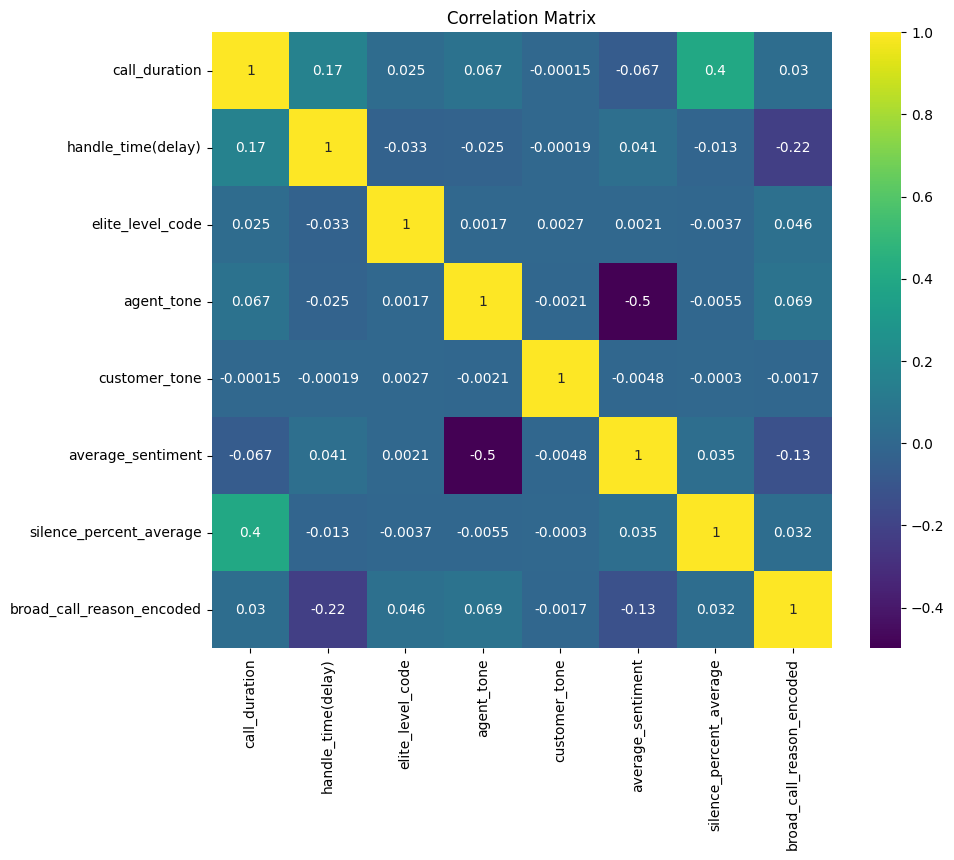

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = A.corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap="viridis")

plt.title("Correlation Matrix")
plt.show()